## This notebook will read the data & pre-process the text:


* Data Source: you can get a digital copy of the book and here is a [source through Amazon](https://www.amazon.sa/-/en/Professional-Guide-Diseases-Laura-Willis/dp/1975107721/ref=sr_1_1?crid=2S3MISAMZQHFQ&keywords=Professional+Guide+to+Diseases&qid=1640875957&sprefix=professional+guide+to+diseases%2Caps%2C366&sr=8-1)



In [187]:
# Data read/write
import PyPDF2
import numpy as np
import pandas as pd

# Data Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [188]:
# Function to convert from list to  str
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

In [189]:
def get_freq_word(TEXT_list):
    """This method calculates the frequency of each  word in a provided text string."""
    Vocab_list = ' '.join(TEXT_list)
    temp_dict = Counter(Vocab_list.split()).items()
    freq_df = pd.DataFrame(temp_dict)
    freq_df = freq_df.sort_values(1, ascending = False)
    return freq_df

### The Book contains 21 chapters, and I decided to ues 3 chapters:
***By focusing on these specific chapters, I aim to conduct targeted experiments that will provide robust evidence to support our hypothesis. This narrowed approach allows for a more in-depth exploration of the subject matter, ensuring the results are both comprehensive and relevant.***

**Chapter name:**
* Ear & Nose.
* Musculoskeletal
* Respiratory

In [190]:
# specify file path 
path = "C:\\Users\\samue\\Downloads\\vocab2.pdf"

# open file and read it through PyPDF2 packages
ff = open( path ,"rb")
pdfReader = PyPDF2.PdfFileReader(ff)

# print the total pages number
print(pdfReader.numPages)
total_page = pdfReader.numPages

87


In [191]:
list_from_pdf =[]
article = " "

# loop through the pages and assign/save the page content in list and str
for page_num  in np.arange(0 , total_page):
    pageObj = pdfReader.getPage(page_num)
    extract = pageObj.extractText().split("\n")
    article += listToString(extract)
    list_from_pdf.append(extract)

    

In [192]:
# save the book content in dataframe
df = pd.DataFrame([article], columns=['string_values'])
print(df.string_values.head())

0     2 Respiratory Disorders Introduction The resp...
Name: string_values, dtype: object


### Data Visualize

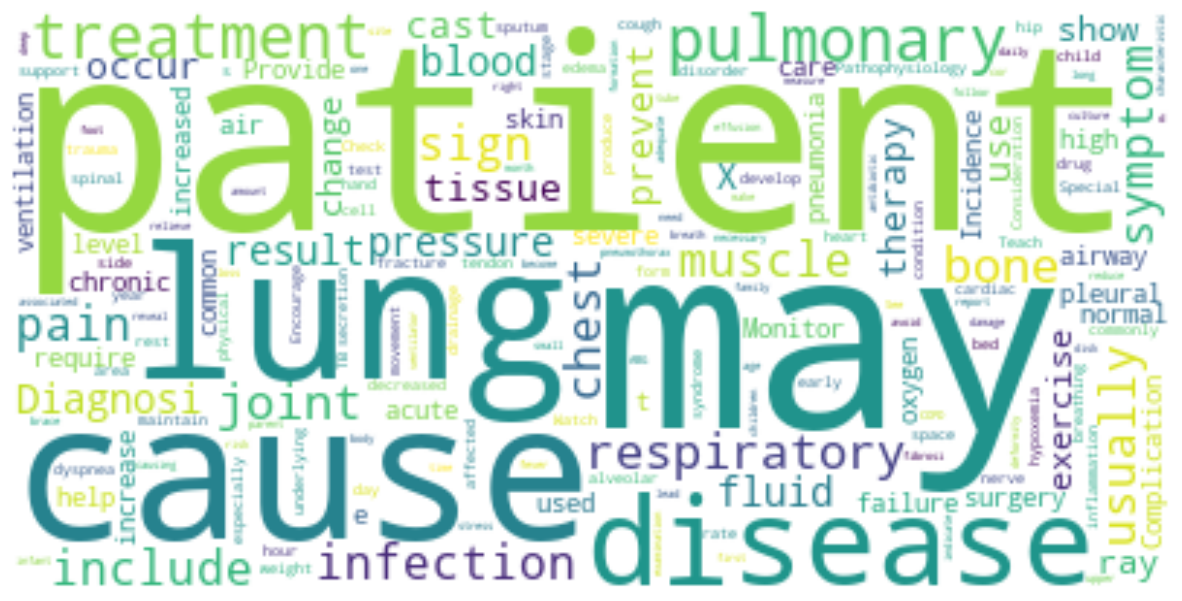

In [193]:
All_text = list(df.string_values)
All_text = " ".join(All_text)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(All_text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

### plot the most common words in the data before perform any data pre-processing

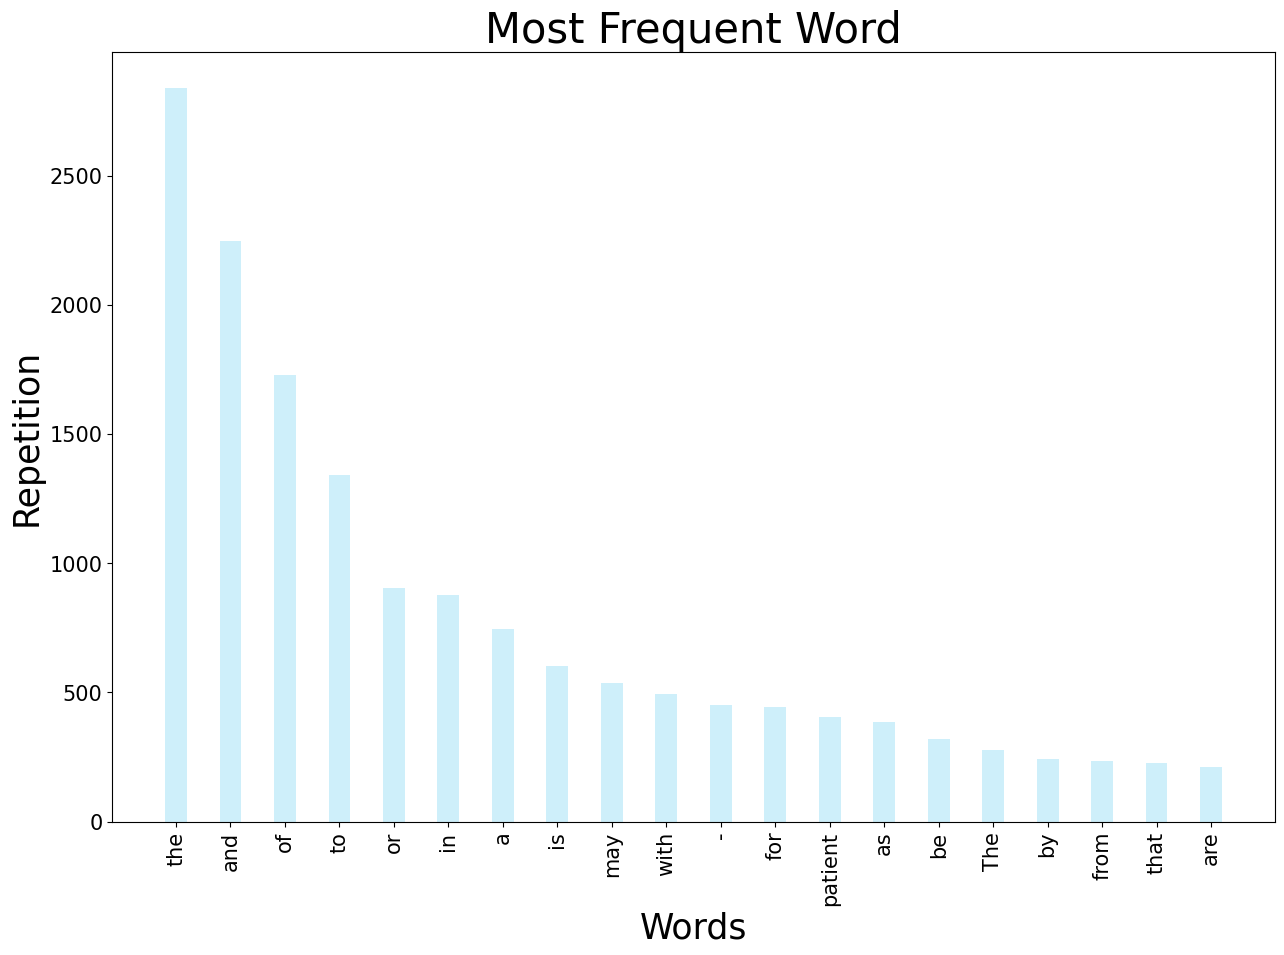

In [194]:
freq_words = get_freq_word(df.string_values)
freq_words.columns = ['WORD', 'COUNT']

plt.figure(figsize=(15,10))
plt.bar(freq_words.WORD[:20], freq_words.COUNT[:20], color ='#ceeffa',
        width = 0.4)
plt.xticks(rotation=90 ,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Words" , fontsize = 25)
plt.ylabel("Repetition", fontsize = 25)
plt.title("Most Frequent Word", fontsize = 30)
plt.show();

# Data Pre-processing:
In this section we will perform the pre-processing techniques that should be done with text

In [195]:
# Import necessary modules
import ssl
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
ssl._create_default_https_context = ssl._create_unverified_context

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Import WordNetLemmatizer, and stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# import spcay framework
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.symbols import amod

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [196]:
# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(All_text)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 3982), ('the', 3122), ('.', 3076), ('and', 2299), ('of', 1734), ('to', 1384), ('in', 1022), ('or', 917), ('a', 815), ('is', 610)]


In [197]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 200 most common tokens
print(bow.most_common(200))

[('patient', 562), ('may', 537), ('cause', 246), ('lung', 225), ('disease', 223), ('pulmonary', 206), ('treatment', 206), ('respiratory', 188), ('joint', 183), ('bone', 183), ('pain', 164), ('also', 163), ('chest', 154), ('muscle', 153), ('usually', 153), ('symptom', 145), ('infection', 142), ('sign', 141), ('diagnosis', 134), ('fluid', 129), ('result', 128), ('pressure', 124), ('include', 122), ('blood', 119), ('therapy', 112), ('cast', 109), ('prevent', 106), ('tissue', 102), ('child', 95), ('use', 94), ('exercise', 90), ('x', 90), ('show', 88), ('change', 87), ('ray', 87), ('pleural', 86), ('complication', 86), ('acute', 84), ('help', 83), ('chronic', 81), ('failure', 81), ('severe', 79), ('oxygen', 76), ('pneumonia', 76), ('ventilation', 75), ('care', 74), ('normal', 73), ('level', 73), ('used', 72), ('occurs', 71), ('air', 70), ('surgery', 69), ('incidence', 69), ('increase', 67), ('airway', 67), ('provide', 67), ('e', 66), ('foot', 66), ('high', 65), ('common', 65), ('increased',

## Using SpaCy to defined adjective words

In [198]:
df['spacy_doc'] = list(nlp.pipe(df.string_values))

In [199]:
doc_adj = [token.text.lower() for doc in df.spacy_doc for token in doc if token.pos_=='ADJ']
doc_noun = [token.text.lower() for doc in df.spacy_doc for token in doc if token.pos_=='NOUN']

In [200]:
Counter(doc_adj).most_common(10)

[('pulmonary', 178),
 ('respiratory', 171),
 ('such', 153),
 ('other', 129),
 ('joint', 85),
 ('pleural', 79),
 ('severe', 77),
 ('chronic', 75),
 ('normal', 72),
 ('common', 64)]

In [201]:
Counter(doc_noun).most_common(10)

[('patient', 399),
 ('disease', 189),
 ('pain', 163),
 ('treatment', 152),
 ('lung', 151),
 ('bone', 144),
 ('patients', 135),
 ('chest', 120),
 ('blood', 119),
 ('symptoms', 116)]

In [202]:
# save the adjective words in list
adj_list = list(set(doc_adj))

In [203]:
print(len(adj_list))

1534


###  By incorporating domain-specific terms into the  stop words list,  performance of our text analysis will be enchanced, ensuring it captures the nuances of the data and filters out common yet irrelevant terms

***Below is a list of domain-specific stop words derived from common terms found in medical literature, particularly those concerning diseases, treatments, and patient care:***

In [204]:
# defined stop words in topic domain
  
stop_words = ["patient", "may", "disease", "cause", "treatment", "also", "symptom", "usually", "sign",
                "diagnosis", "result", "pain", "include", "pressure", "lung", "pulmonary", "respiratory",
                "chest", "fluid", "complication", "change", "blood", "infection", "therapy", "prevent",
                "acute", "care", "child", "level", "air", "use", "severe", "help", "used", "exercise",
                "normal", "incidence", "pneumonia","tissue", "show", "chronic", "failure", "cast", "increased",
                "monitor", "hypoxemia", "produce", "edema", "increase", "space", "occurs", "cough", "alveolar", 
                "heart", "pathophysiology", "sputum", "provide", "decreased", "pneumothorax", "test", "special",
                "tube", "condition", "common", "surgery","secretion", "fibrosis", "disorder", "pa", "area", "form",
                "cell", "skin", "drainage", "tb", "year", "commonly", "check", "teach", "rest", "watch", "encourage", 
                "underlying", "consideration", "et", "early", "hour", "family", "need", "effusion", "body", "drug", "support", 
                "rate", "syndrome", "requires", "inflammation", "abg", "side", "infant", "however", "upper", "cor", "pulmonale",
                 "ventilator", "mechanical", "breath", "maintain" , "foot", "day", "bed", "parent", "especially", "fever", "culture",
                'system', 'within', 'factor', 'amount', 'death', 'movement', 'progress', 'volume', 'one', 'stage', 'report',
                'avoid', 'respiration', 'trauma', 'occur', 'atelectasis', 'hand', 'includes', 'weight', 'tendon', 'hypertension', 
                'le', 'time', 'lead', 'damage', 'causing', 'require', 'activity', 'injury', 'risk', 'mm', 'measure', 'examination',
                'nerve', 'stress', 'make', 'al', 'see', 'decrease', 'age', 'hg''case', 'month', 'coughing', 'develops', 'formation', 
                'without', 'site', 'every', 'reduce', 'relieve', 'effect','percussion', 'ordered', 'develop', 'affect', 'loss', 'flow',
                'lesion', 'technique', 'exposure', 'gas', 'finding', 'procedure', 'begin', 'wall', 'immediately', 'type', 'response', 
                'position', 'needed', 'administer', 'control', 'ass', 'increasing', 'although', 'tell', 'output', 'give', 'analysis',
                'history', 'often' ,'week', 'home', 'perform','function', 'typically', 'frequently', 'adult', 'indicate', 'administration',
                'explain', 'using', 'suggest', 'called', 'center', 'head', 'people', 'resulting', 'including', 'period', 'feature'
                   ]

In [205]:
# marge (adjective & topic domain stop words) list
new_stopwords = adj_list+stop_words

In [206]:
stpwrd = stopwords.words('english')

In [207]:
print(f' adjective words = {len(adj_list)}')
print(f' topic domain stop words = {len(stop_words)}')
print(f' marge adj_list & stop_words =  {len(new_stopwords)}')
print(f' english stop words = {len(stpwrd)}')

 adjective words = 1534
 topic domain stop words = 216
 marge adj_list & stop_words =  1750
 english stop words = 179


In [208]:
stpwrd.extend(new_stopwords)

print(f'after marge all of the stop words = {len(stpwrd)}')

after marge all of the stop words = 1929


In [209]:
# Remove all stop words: no_stops
no_stops01 = [t for t in lemmatized if t not in stpwrd ]

# Create the bag-of-words: bow
bow = Counter(no_stops01)

# Print the 100 most common tokens
print(bow.most_common(100))

[('bone', 183), ('muscle', 153), ('x', 90), ('ray', 87), ('oxygen', 76), ('ventilation', 75), ('airway', 67), ('e', 66), ('breathing', 59), ('dyspnea', 51), ('deformity', 48), ('hip', 47), ('brace', 45), ('copd', 43), ('disk', 38), ('obstruction', 36), ('sound', 36), ('arthritis', 36), ('leg', 34), ('traction', 34), ('dystrophy', 33), ('calcium', 33), ('kyphosis', 33), ('well', 32), ('case', 32), ('advise', 31), ('osteoporosis', 31), ('cartilage', 31), ('aspiration', 30), ('instruct', 30), ('serum', 30), ('torticollis', 30), ('alveolus', 29), ('r', 29), ('attack', 29), ('splint', 29), ('knee', 29), ('toe', 29), ('degree', 28), ('collapse', 28), ('swelling', 28), ('must', 27), ('metabolic', 27), ('neck', 27), ('follow', 27), ('acidosis', 27), ('artery', 26), ('reveals', 26), ('heat', 26), ('hg', 25), ('thoracic', 25), ('biopsy', 25), ('crackle', 25), ('promote', 25), ('medication', 25), ('two', 24), ('membrane', 24), ('fiber', 24), ('osteomyelitis', 24), ('take', 23), ('place', 23), ('c

### plot word cloud after did the pre-process

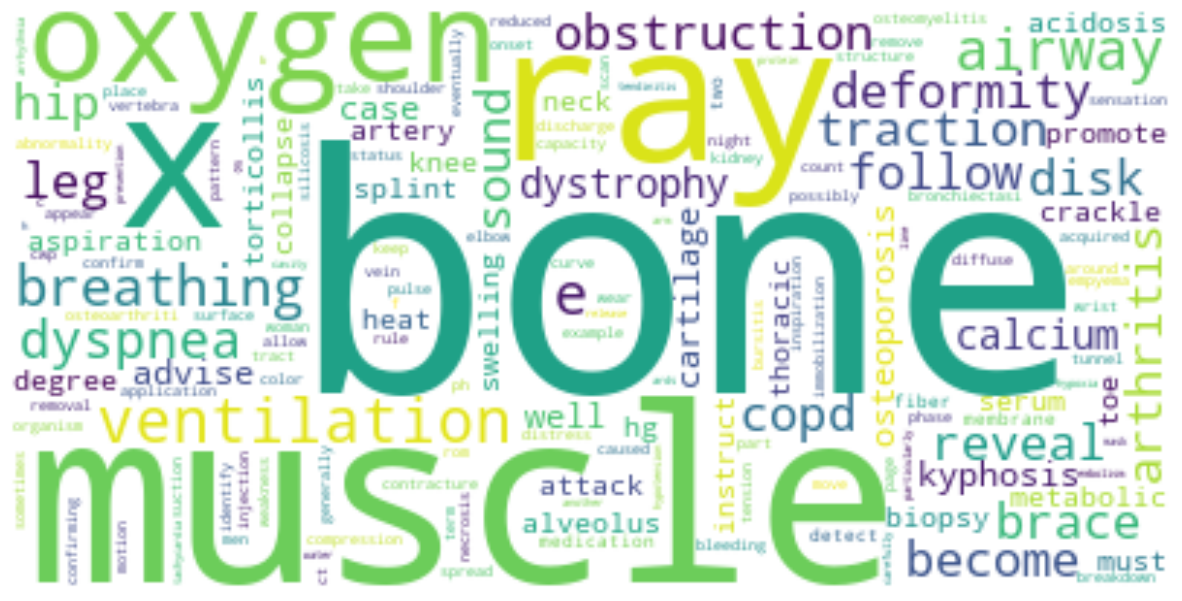

In [210]:
All_text = " ".join(no_stops01)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(All_text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

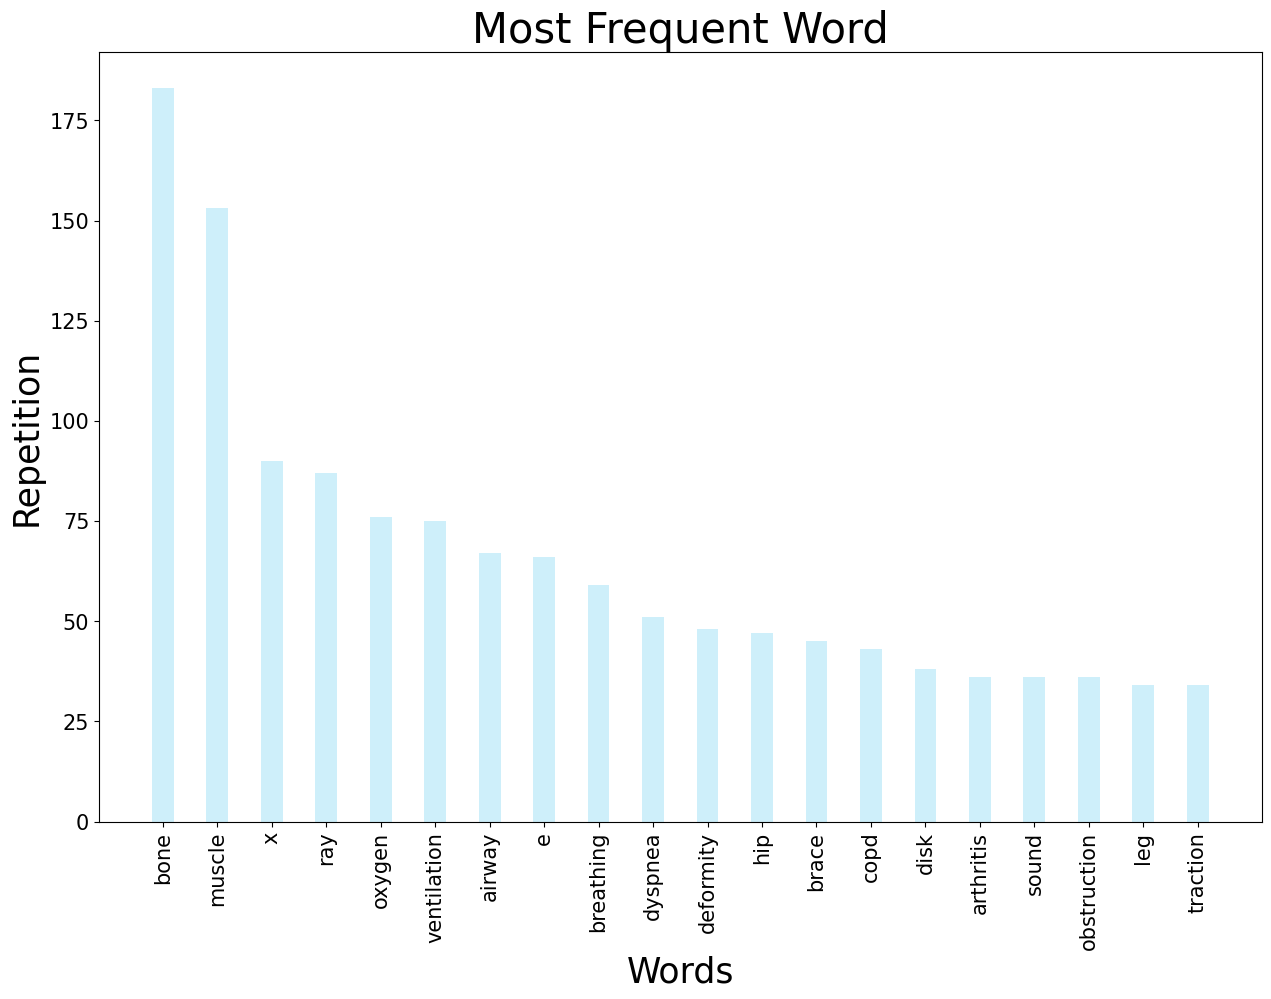

In [211]:
freq_words = get_freq_word(no_stops01)
freq_words.columns = ['WORD', 'COUNT']

plt.figure(figsize=(15,10))
plt.bar(freq_words.WORD[:20], freq_words.COUNT[:20], color ='#ceeffa',
        width = 0.4)
plt.xticks(rotation=90 ,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Words" , fontsize = 25)
plt.ylabel("Repetition", fontsize = 25)
plt.title("Most Frequent Word", fontsize = 30)
plt.show();

### Save dataframe into csv file formate 

In [212]:
corpus = " ".join(no_stops01)
string = corpus
df01 = pd.DataFrame([string], columns=['string_values'])

In [213]:
df01.to_csv('all_chapters.csv', index=False)

In [214]:
# save stop words list in pickle file, to use it later
import pickle
with open('stop_words.ob', 'wb') as fp:
    pickle.dump(stpwrd, fp)